In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('hr_data_clean.csv')

In [5]:
df.head()

,age,attrition,businesstravel,dailyrate($),department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate($),jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome($),monthlyrate($),numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome($),datebirth,salary($),roledepartament,numberchildren,remotework,edad_temp
0,51,no,unknown,2015.722222,unknown,6,3,unknown,1,1,1,male,251.965278,3,5,research director,3,unknown,16280.830000,42330.17,7,True,no,13,3,3,full time,0,NaN,5,3,20,NaN,15,15,16280.830000,1970-01-01 00:00:00.000001972,195370.00,unknown,NaN,True,55
1,52,no,unknown,2063.388889,unknown,1,4,life sciences,1,2,3,male,257.923611,2,5,manager,3,unknown,16665.833333,43331.17,0,True,unknown,14,3,1,unknown,1,34.0,5,3,33,NaN,11,9,16665.833333,1970-01-01 00:00:00.000001971,199990.00,unknown,NaN,True,55
2,42,no,travel rarely,1984.253968,research & development,4,2,technical degree,1,3,3,male,248.031746,3,5,manager,4,married,16026.666667,41669.33,1,True,no,11,3,4,unknown,0,22.0,3,3,22,NaN,11,15,16026.666667,1970-01-01 00:00:00.000001981,192320.00,manager research & development,NaN,True,55
3,47,no,travel rarely,1771.404762,unknown,2,4,medical,1,4,1,female,221.425595,3,4,research director,3,married,14307.500000,37199.50,3,True,unknown,19,3,2,full time,2,NaN,2,3,20,NaN,5,6,14307.500000,1970-01-01 00:00:00.000001976,171690.00,unknown,NaN,False,55
4,46,no,unknown,1582.771346,unknown,3,3,technical degree,1,5,1,female,197.846418,4,4,sales executive,1,divorced,12783.920000,33238.20,2,True,no,12,3,4,unknown,1,NaN,5,3,19,NaN,2,8,12783.920000,1970-01-01 00:00:00.000001977,153407.04,unknown,NaN,False,55


1. ¿Existe una diferencia significativa en las tasas de rotación y/o en el nivel de satisfacción laboral en función del género (hombre/mujer) o del estado civil del empleado?


2. ¿Cuál es la relación entre la edad media de los empleados y las tasas de rotación de personal (correlación entre juventud y mayor rotación vs. edad avanzada y estabilidad)?

gender
environmentsatisfaction
relationshipsatisfaction
worklifebalance	
jobsatisfaction
maritalstatus
yearsatcompany
yearsincurrentrole

In [ ]:
Age 


In [ ]:
df.describe()

,age,dailyrate($),distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate($),jobinvolvement,joblevel,jobsatisfaction,monthlyincome($),monthlyrate($),numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome($),salary($),numberchildren,edad_temp
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.0,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1129.000000,1678.000000,1678.000000,1678.000000,35.000000,1678.000000,1678.000000,1189.000000,1.678000e+03,0.0,1678.0
mean,36.949940,668.079714,11.184744,2.932658,1.0,809.859952,2.695471,83.509964,2.740763,2.064362,2.743147,5607.833229,14029.674648,2.670441,15.154350,3.131704,2.700238,0.787843,11.359610,2.795590,2.775924,7.124553,3.971429,2.241955,4.200238,5676.787065,6.541195e+04,NaN,55.0
std,9.155706,470.787298,10.479008,1.024270,0.0,467.084867,1.107083,58.848412,0.710359,1.099425,1.105172,5601.610140,9886.532728,2.501133,3.649607,0.338270,1.079494,0.843252,7.807298,1.288657,0.681884,6.173837,3.584983,3.246554,3.554224,6157.859086,5.235902e+04,NaN,0.0
min,18.000000,104.103175,1.000000,1.000000,1.0,1.000000,1.000000,13.012897,1.000000,1.000000,1.000000,909.166667,2186.170000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.009000e+04,NaN,55.0
25%,30.000000,290.035510,2.000000,2.000000,1.0,403.250000,2.000000,36.254439,2.000000,1.000000,2.000000,2342.594167,6090.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2342.590000,2.811113e+04,NaN,55.0
50%,36.000000,556.256661,8.000000,3.000000,1.0,813.500000,3.000000,69.532083,3.000000,2.000000,3.000000,4492.840000,11681.390000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,2.000000,1.000000,3.000000,4492.840000,5.391411e+04,NaN,55.0
75%,43.000000,971.956349,17.000000,4.000000,1.0,1215.750000,4.000000,121.494544,3.000000,3.000000,4.000000,7985.835000,20411.080000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,6.500000,3.000000,7.000000,7861.670000,9.434000e+04,NaN,55.0
max,60.000000,2063.388889,49.000000,5.000000,1.0,1614.000000,4.000000,257.923611,4.000000,5.000000,4.000000,94083.000000,43331.170000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,13.000000,15.000000,17.000000,94083.000000,1.118004e+06,NaN,55.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   int64  
 1   attrition                 1678 non-null   object 
 2   businesstravel            1678 non-null   object 
 3   dailyrate($)              1678 non-null   float64
 4   department                1678 non-null   object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            1678 non-null   object 
 8   employeecount             1678 non-null   int64  
 9   employeenumber            1678 non-null   int64  
 10  environmentsatisfaction   1678 non-null   int64  
 11  gender                    1678 non-null   object 
 12  hourlyrate($)             1678 non-null   float64
 13  jobinvolvement            1678 non-null   int64  
 14  joblevel

In [9]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate($)', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate($)',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome($)', 'monthlyrate($)',
       'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome($)', 'datebirth', 'salary($)', 'roledepartament',
       'numberchildren', 'remotework', 'edad_temp'],
      dtype='object')

In [8]:
df[['gender', 'environmentsatisfaction', 'relationshipsatisfaction', 'worklifebalance', 'jobsatisfaction', 'maritalstatus', 'yearsatcompany', 'yearsincurrentrole']]

,gender,environmentsatisfaction,relationshipsatisfaction,worklifebalance,jobsatisfaction,maritalstatus,yearsatcompany,yearsincurrentrole
0,male,1,3,3,3,unknown,20,NaN
1,male,3,1,3,3,unknown,33,NaN
2,male,3,4,3,4,married,22,NaN
3,female,1,2,3,3,married,20,NaN
4,female,1,4,3,1,divorced,19,NaN
...,...,...,...,...,...,...,...,...
1673,female,2,4,3,3,single,3,NaN
1674,female,4,3,3,3,married,5,NaN
1675,male,3,1,3,4,unknown,6,NaN
1676,female,3,3,3,2,divorced,22,NaN


In [10]:
df['yearsincurrentrole'].unique()

array([nan, 13., 12., 11.,  7.,  6.,  4.,  3.,  2.,  1.,  0.])

In [30]:
porcentajes = df["gender"].value_counts(normalize=True)* 100
print(porcentajes)

gender
male      60.131108
female    39.868892
Name: proportion, dtype: float64


''

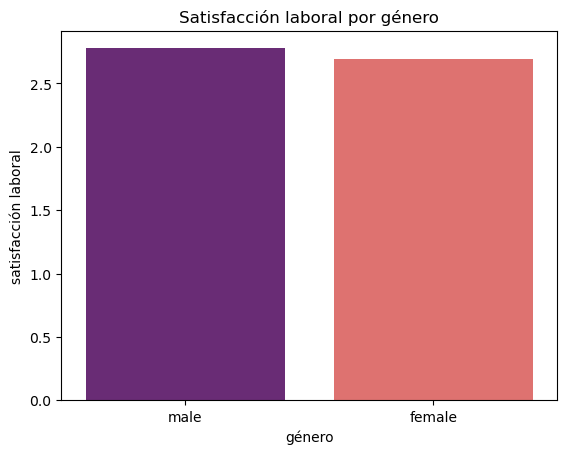

In [6]:
sns.barplot(data=df, x="gender", y="jobsatisfaction", hue="gender", errorbar=None, palette="magma")
plt.title("Satisfacción laboral por género")
plt.ylabel ("satisfacción laboral")
plt.xlabel ("género")
;

C:\Users\micae\AppData\Local\Temp\ipykernel_14320\2677508500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="maritalstatus", y="jobsatisfaction", errorbar=None, palette="magma")


''

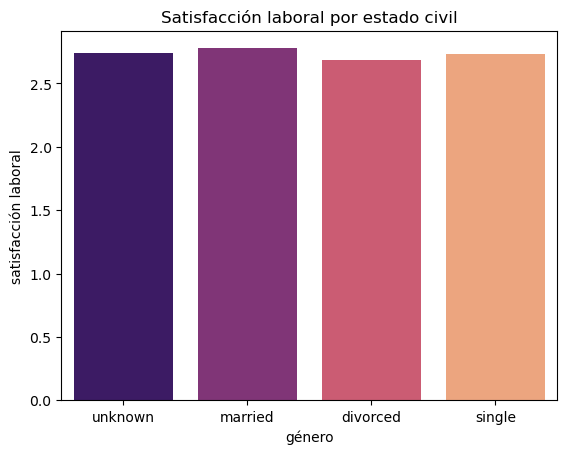

In [8]:
sns.barplot(data=df, x="maritalstatus", y="jobsatisfaction", errorbar=None, palette="magma")
plt.title("Satisfacción laboral por estado civil")
plt.ylabel ("satisfacción laboral")
plt.xlabel ("género")
;

''

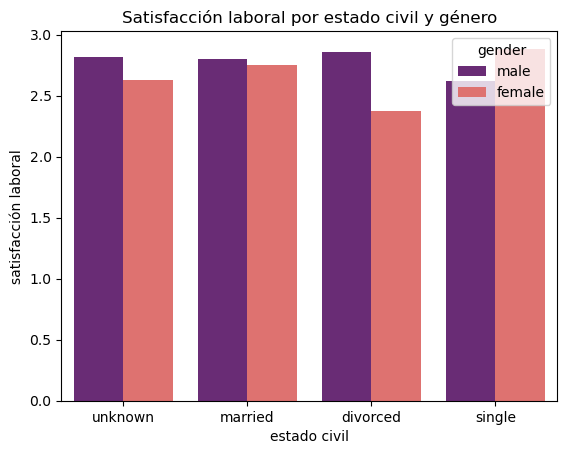

In [9]:
sns.barplot(data=df, x="maritalstatus", y="jobsatisfaction", hue= "gender", errorbar=None, palette="magma")
plt.title("Satisfacción laboral por estado civil y género")
plt.ylabel ("satisfacción laboral")
plt.xlabel ("estado civil")
;

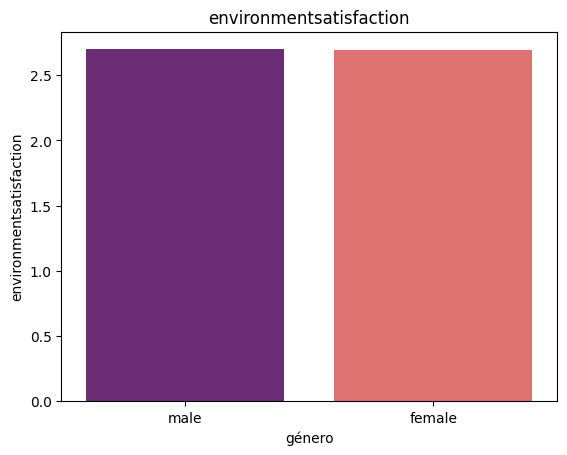

In [32]:
sns.barplot(data=df, x="gender", y="environmentsatisfaction", hue="gender", errorbar=None, palette="magma")
plt.title("environmentsatisfaction")
plt.ylabel ("environmentsatisfaction")
plt.xlabel ("género");

## Índice de satisfacción general:

In [15]:
cols_satisf = ["environmentsatisfaction", "relationshipsatisfaction", "worklifebalance", "jobsatisfaction"]
df["satisfaction_total"] = df[cols_satisf].mean(axis=1)

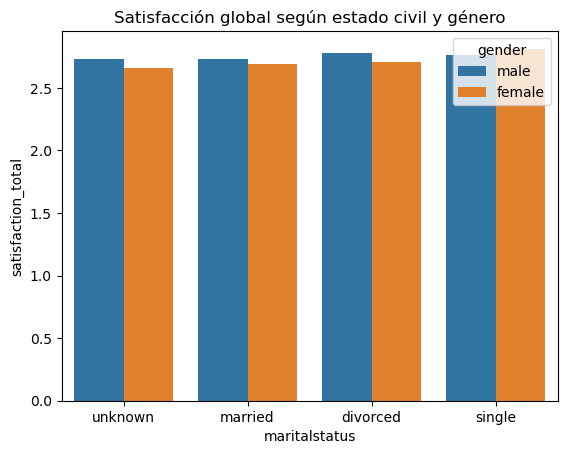

In [16]:
sns.barplot(data=df, x="maritalstatus", y="satisfaction_total", hue="gender", errorbar=None)
plt.title("Satisfacción global según estado civil y género")
plt.show()

## Satisfacción total según años en la compañía

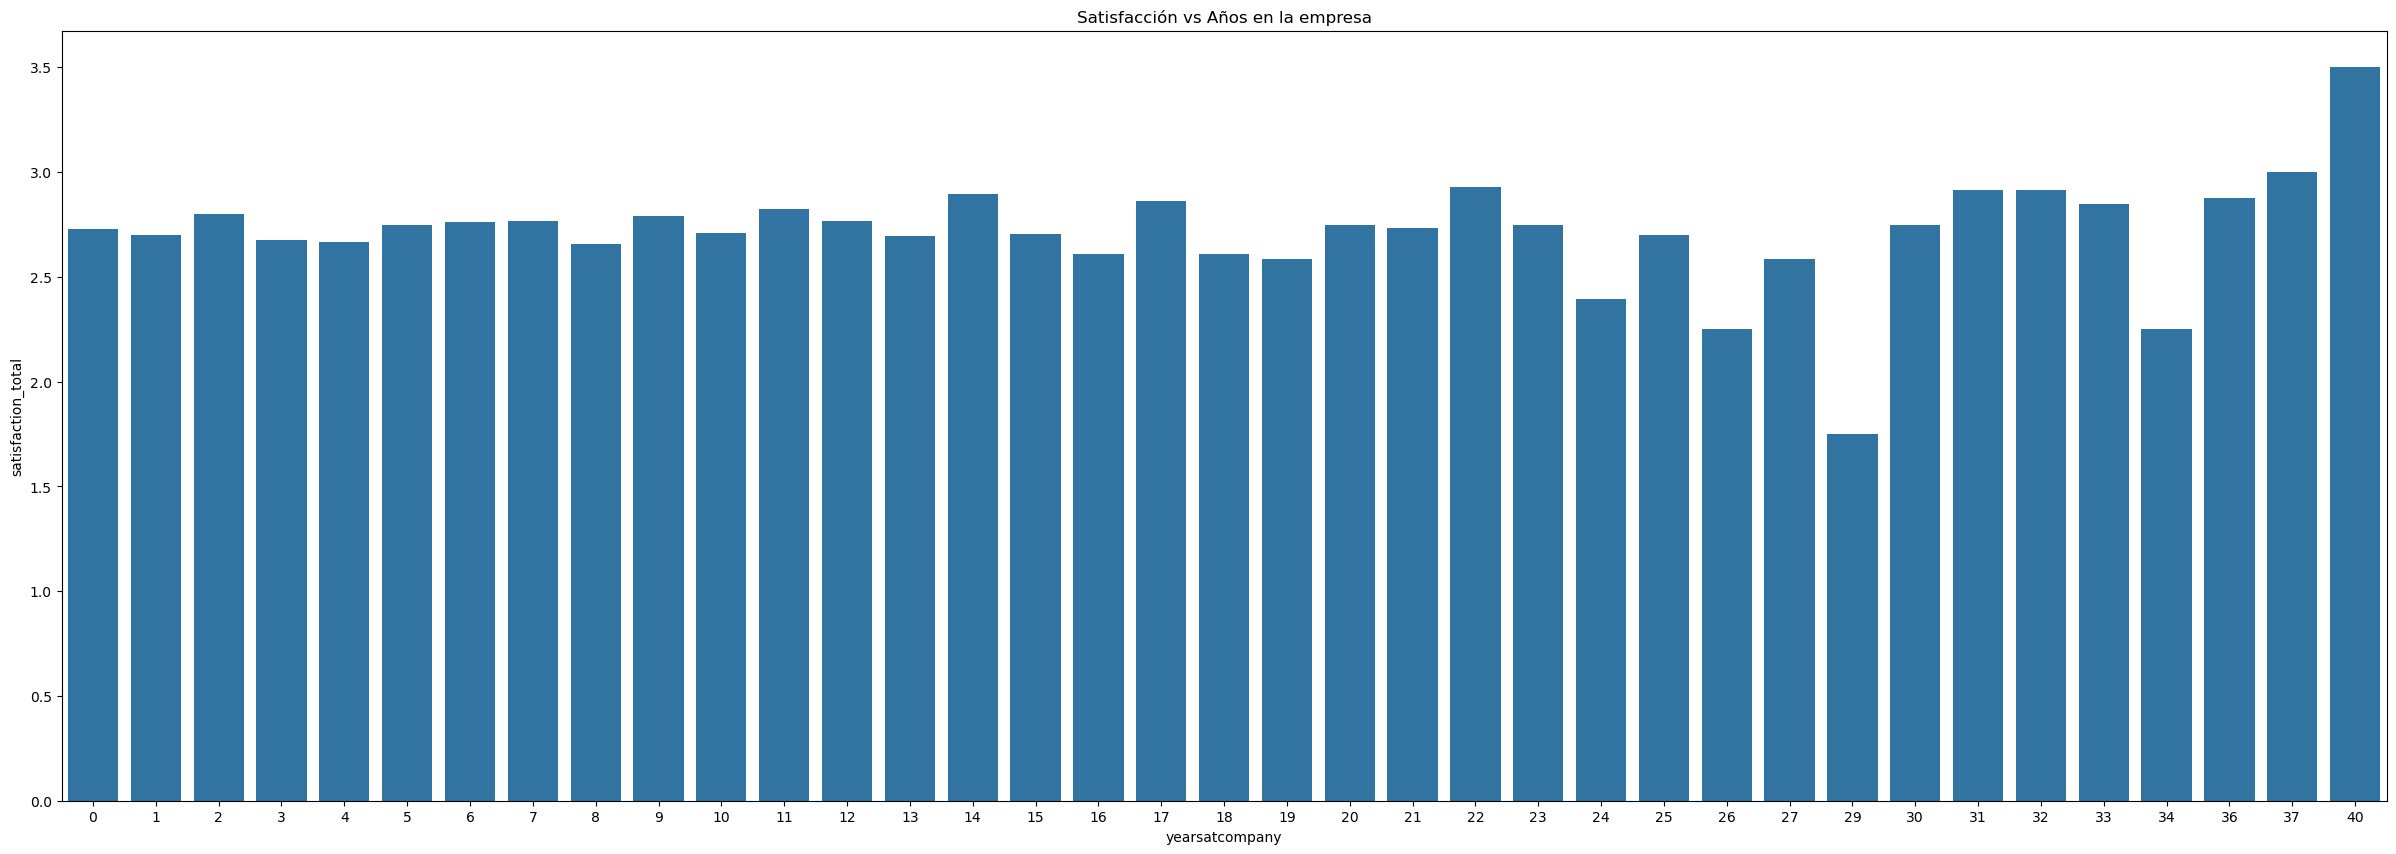

In [ ]:
plt.figure(figsize=(30,10))

sns.barplot(data=df, x="yearsatcompany", y="satisfaction_total", errorbar=None)
plt.title("Satisfacción vs Años en la empresa");

#mirar qué salario tienen los que están menos satisfechos. Comparativa con el resto. 
#los que llevan 40 años, probablemente son los fundadores. Más experiencia, más satisfacción. 3 años fijos y luego ampliaron la empresa. 


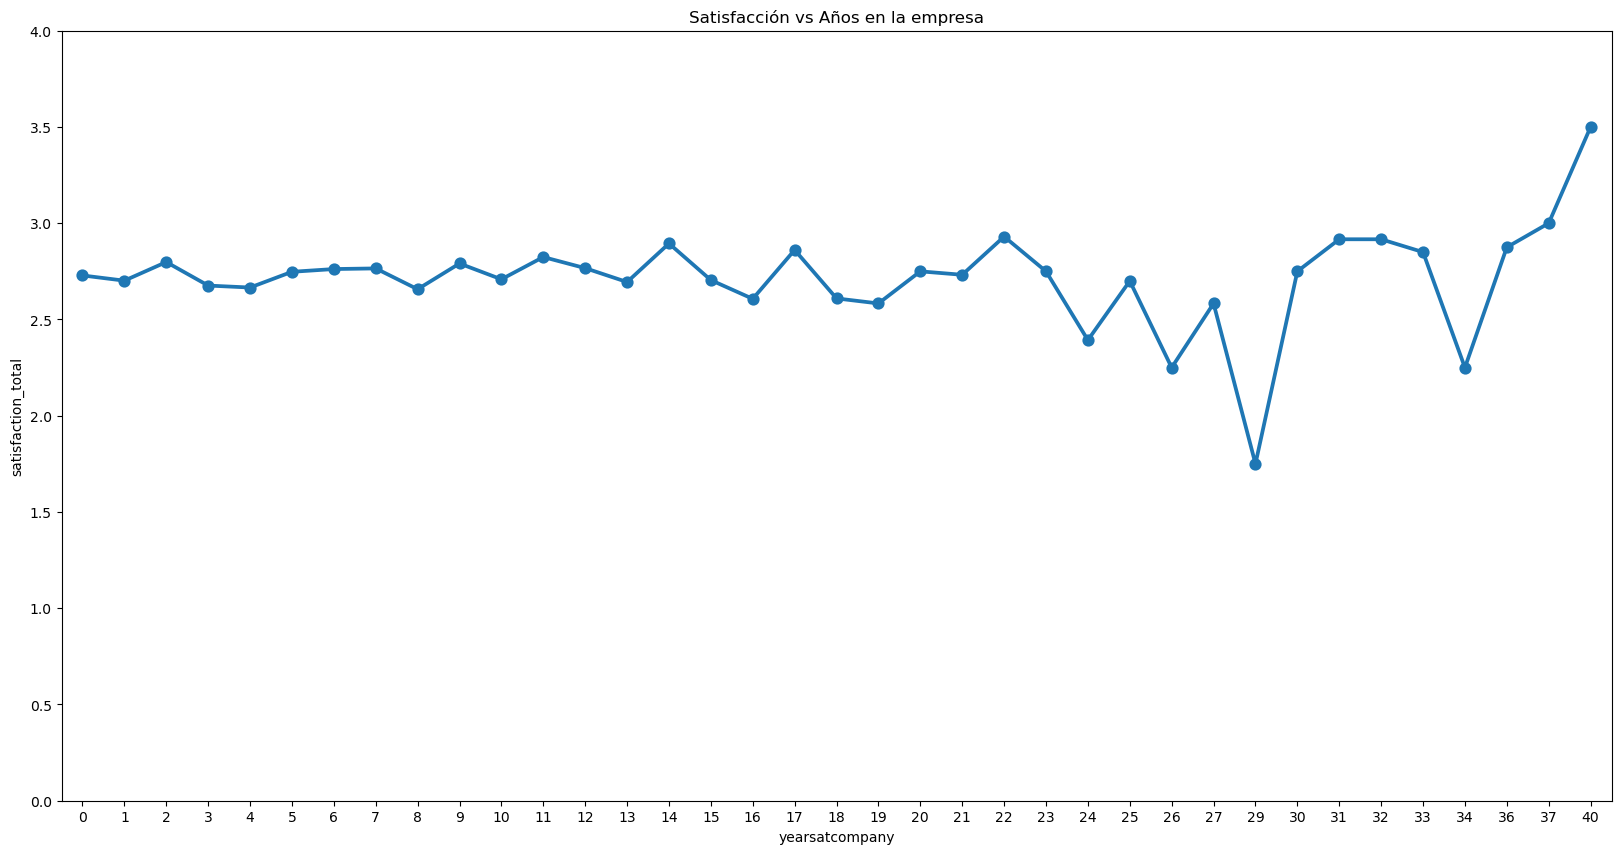

In [ ]:

plt.figure(figsize=(20,10))

sns.pointplot(data=df, x="yearsatcompany", y="satisfaction_total", errorbar=None)
minimo_y = 0
maximo_y = 4
plt.ylim(minimo_y, maximo_y)
plt.title("Satisfacción vs Años en la empresa");


#USAR ESTE EN PRESENTACIÓN CON BASE 0 

C:\Users\micae\AppData\Local\Temp\ipykernel_14320\1130118597.py:18: UserWarning: 
The palette list has fewer values (8) than needed (703) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x="yearsatcompany", y="satisfaction_total", hue = "salary($)", palette = colors)


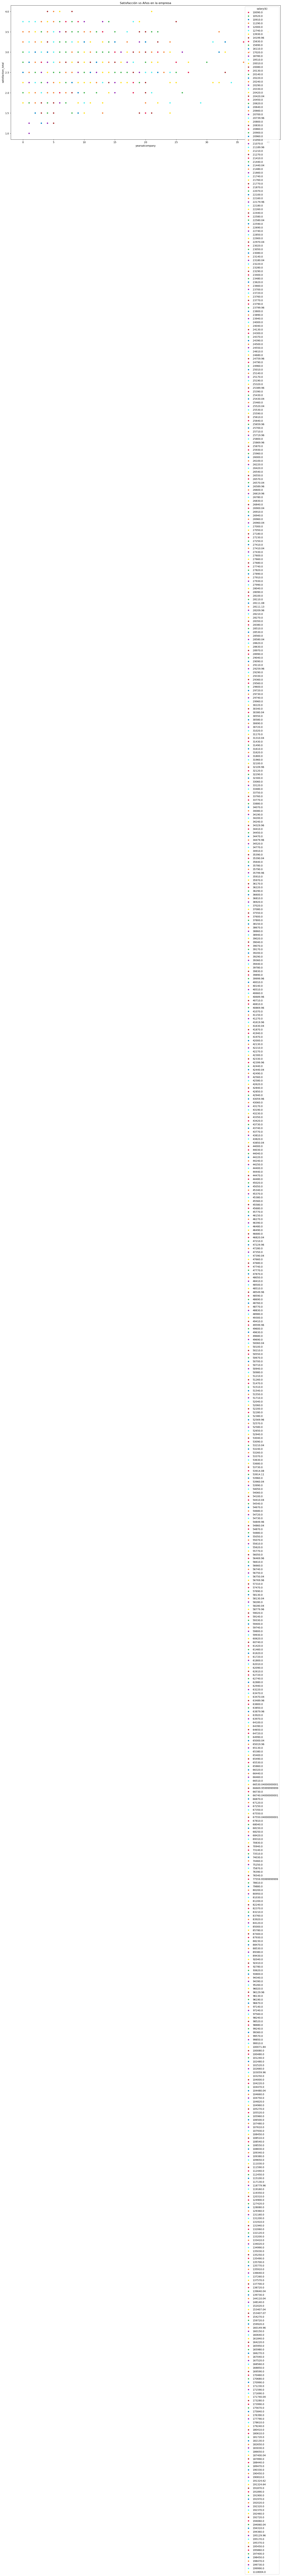

In [38]:


#gráfico dispersión
#mirar qué salario tienen los que están menos satisfechos. Comparativa con el resto. 
#los que llevan 40 años, probablemente son los fundadores. Más experiencia, más satisfacción. 3 años fijos y luego ampliaron la empresa. 

plt.figure(figsize=(20,10))
#Paleta altamente diferenciada
colors = [
    "#E6194B",  # rojo
    "#3CB44B",  # verde
    "#0082C8",  # azul
    "#F58231",  # naranja
    "#911EB4",  # púrpura
    "#46F0F0",  # cian
    "#FFE119",  # amarillo
    "#A52A2A",  # marrón rojizo
]

sns.scatterplot(data=df, x="yearsatcompany", y="satisfaction_total", hue = "salary($)", palette = colors)
plt.title("Satisfacción vs Años en la empresa");


#no tiene sentido porque hay 703 salarios. Habría que hacerlo con bins. 

In [10]:
# Crear rangos de edad en intervalos de 5 años
bins = range(18, df["age"].max() + 5, 5)
labels = [f"{b}-{b+4}" for b in bins[:-1]]

df["age_bin"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)


C:\Users\elepf\AppData\Local\Temp\ipykernel_33184\4081571094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="attrition", y="age", palette="magma")


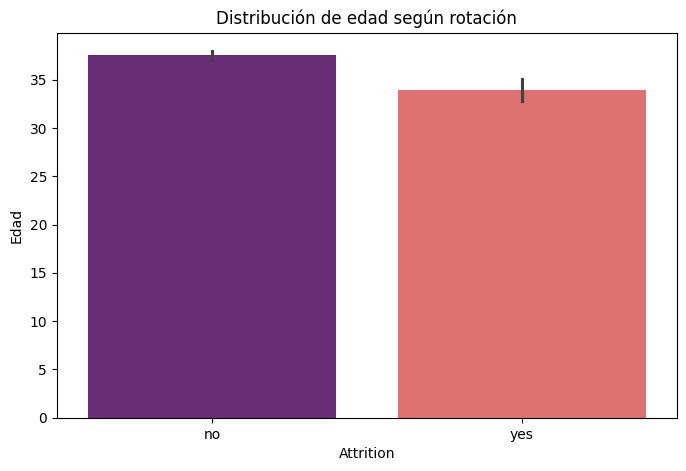

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="attrition", y="age", palette="magma")
plt.title("Distribución de edad según rotación")
plt.xlabel("Attrition")
plt.ylabel("Edad");

In [17]:
plt.figure(figsize=(10,5))
rate = df.groupby("age_bin")["attrition"].mean().reset_index()

sns.barplot(data=rate, x="age_bin", y="attrition", palette="magma")
plt.title("Tasa de rotación por rango de edad")
plt.ylabel("Tasa de rotación (proporción)")
plt.xlabel("Rango de edad")
plt.xticks(rotation=45)
plt.show()

C:\Users\elepf\AppData\Local\Temp\ipykernel_33184\3115787565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby("age_bin")["attrition"].mean().reset_index()


TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1000x500 with 0 Axes>